<a href="https://colab.research.google.com/github/SpaceXdaehan/Python/blob/main/ml06_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score


# Wine 데이터셋

white, red 와인 분류

In [ ]:
# csv 파일 github url
wine_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/wine.csv'

In [ ]:
wine = pd.read_csv(wine_csv)

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


## 데이터 탐색

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine['class'].unique()  #> class 컬럼 - 카테고리 변수

array([0., 1.])

In [ ]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

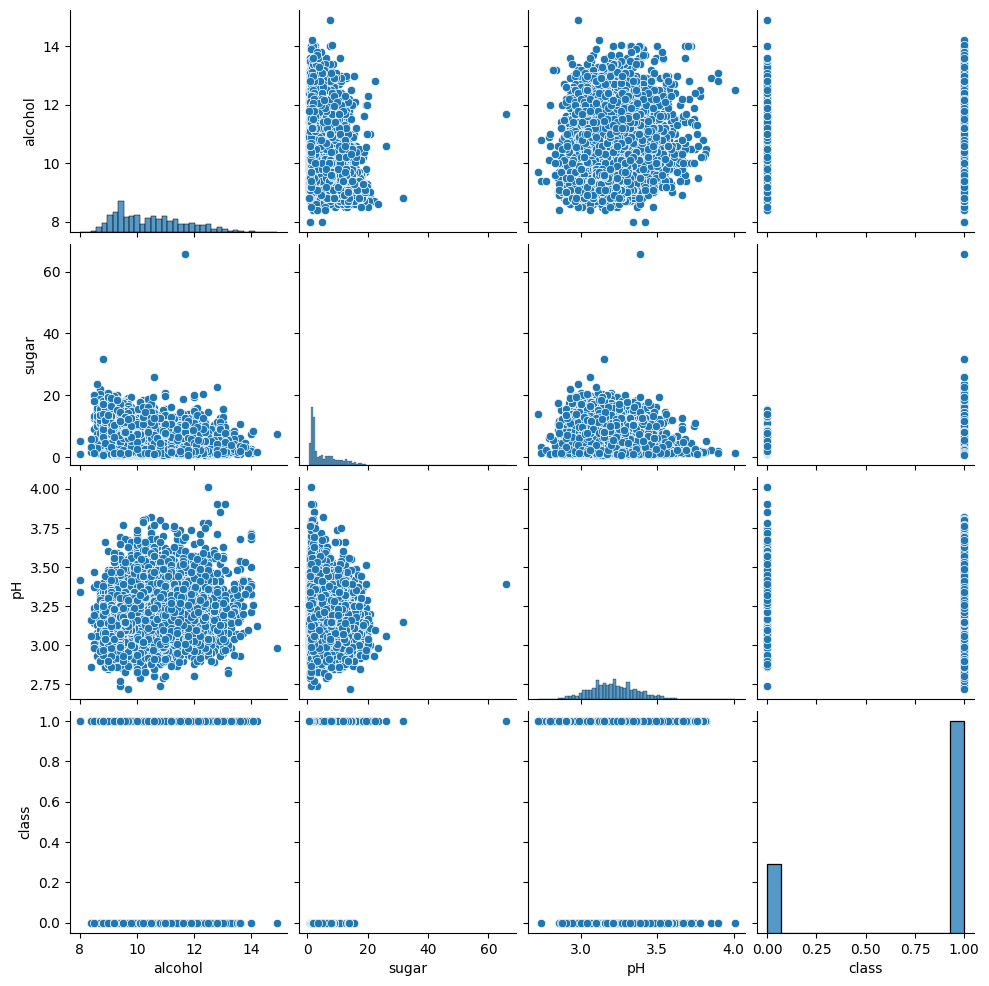

In [ ]:
sns.pairplot(data=wine)
plt.show()

## 데이터프레임을 특성 배열, 타겟 배열로 분리

In [ ]:
X = wine.iloc[:, :-1].values  # 특성 (2차원) 배열
y = wine['class'].values  # 타겟 (1차원) 배열

In [ ]:
X.shape  # 특성 배열의 shape = (n_samples, n_features)

(6497, 3)

In [ ]:
y.shape  # 타겟 배열의 shape = (n_samples,)

(6497,)

In [ ]:
feature_names = ['alcohol', 'sugar', 'ph']  # 특성의 이름들
target_names = ['red', 'white']  # 타겟의 이름들(0: red, 1: white)

# 훈련, 검증, 테스트 셋 분리

In [ ]:
# 훈련 셋, 테스트 셋 분리
X_tr_total, X_te, y_tr_total, y_te = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=y)

In [ ]:
X_tr_total.shape, X_te.shape, y_tr_total.shape, y_te.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [ ]:
np.unique(y_tr_total, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [ ]:
np.unique(y_te, return_counts=True)

(array([0., 1.]), array([320, 980]))

In [ ]:
# 훈련 셋을 다시 훈련 셋과 검증 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_total, y_tr_total,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_total)

In [ ]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((4157, 3), (1040, 3), (4157,), (1040,))

# Decision Tree(의사결정 나무) 분류

## 모델 생성

In [ ]:
tree_clf = DecisionTreeClassifier()

## 모델 훈련(데이터 학습)

In [ ]:
tree_clf.fit(X_tr, y_tr)

DecisionTreeClassifier()

## 훈련 셋 예측 결과 평가

In [ ]:
y_tr_pred = tree_clf.predict(X_tr)

In [ ]:
accuracy_score(y_tr, y_tr_pred)

0.9980755352417608

In [ ]:
confusion_matrix(y_tr, y_tr_pred)

array([[1022,    1],
       [   7, 3127]])

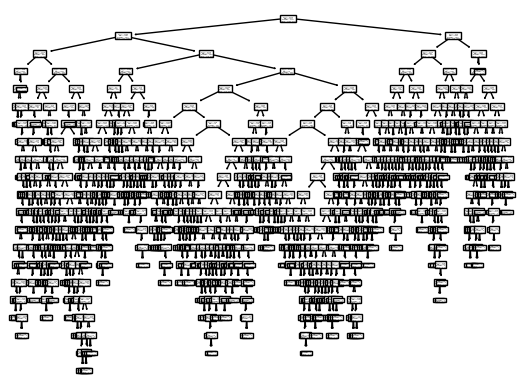

In [ ]:
plot_tree(tree_clf)
plt.show()

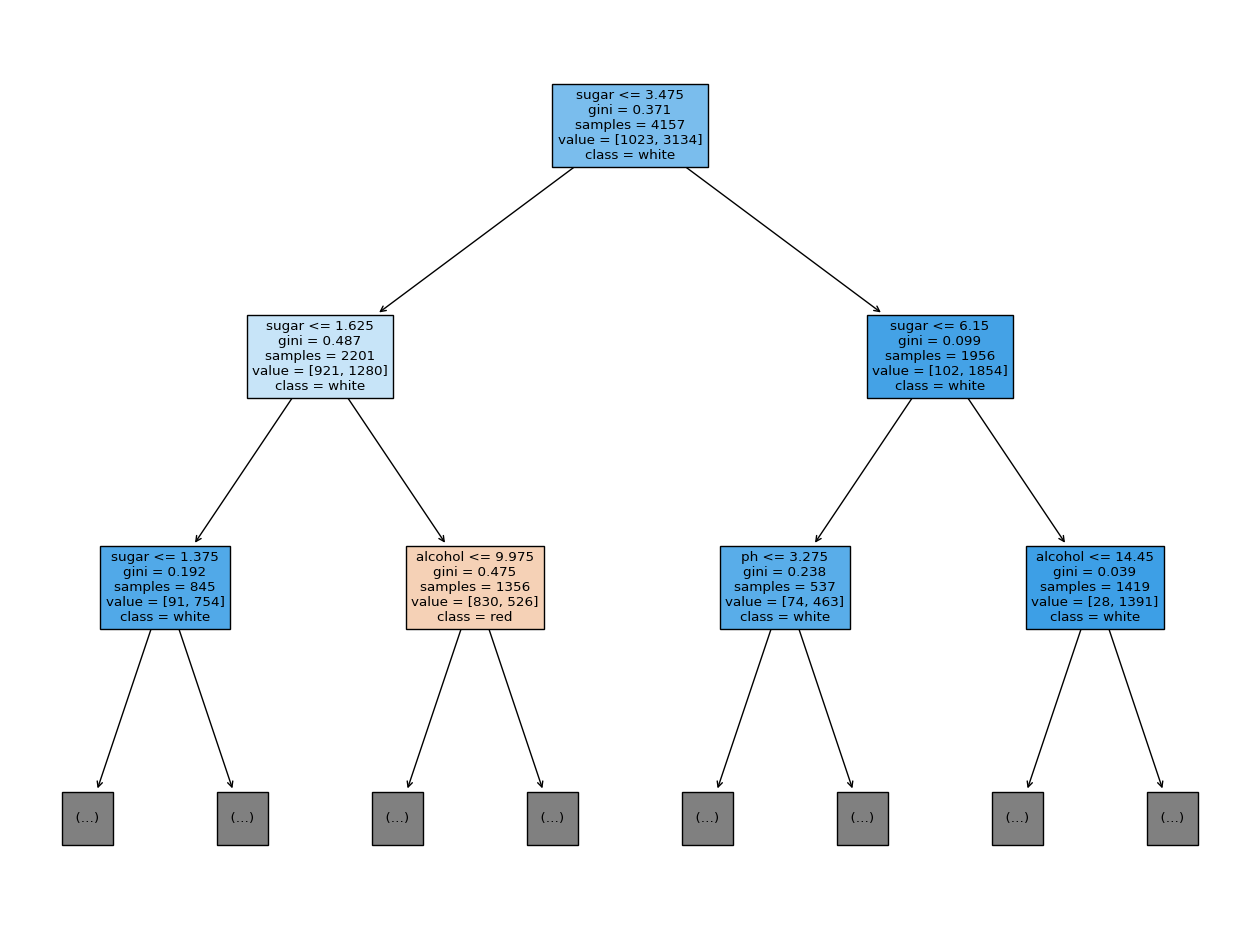

In [ ]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2,
          feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

*  Decision Tree의 장점:
    *  특성들의 스케일을 변환할 필요가 없음.
    *  결과를 이해하기 쉬움.
*  Decision Tree의 단점:
    *  과대적합(overfitting)되기 쉬움.
        *  규제를 적용하거나 하이퍼파라미터 튜닝을 통해서 과대적합을 해결해야 함.

## 검증 셋 예측 결과 평가

In [ ]:
y_val_pred = tree_clf.predict(X_val)

In [ ]:
accuracy_score(y_val, y_val_pred)

0.8740384615384615

In [ ]:
confusion_matrix(y_val, y_val_pred)

array([[195,  61],
       [ 70, 714]])

# 하이퍼파라미터 튜닝

*  `DecisionTreeClassifier` 생성자의 파라미터 `max_depth`를 1 ~ 20까지 바꿔가면서
    *  DecisionTree 모델 생성, 훈련
    *  훈련 셋 정확도 저장
    *  검증 셋 정확도 저장
*  `max_depth`에 따른 훈련/검증 셋의 정확도 그래프 시각화

In [ ]:
train_scores = []  # 훈련 셋 정확도들을 저장할 리스트
val_scores = []  # 검증 셋 정확도들을 저장할 리스트

depths = np.arange(1, 21)  # [1, 2, 3, ..., 19, 20]
for d in depths:
    tree_clf = DecisionTreeClassifier(max_depth=d)  # 모델 생성
    tree_clf.fit(X_tr, y_tr)  # 모델 훈련
    tr_acc = tree_clf.score(X_tr, y_tr)  # 훈련 셋 정확도
    train_scores.append(tr_acc)
    val_acc = tree_clf.score(X_val, y_val)  # 검증 셋 정확도
    val_scores.append(val_acc)

In [ ]:
print(train_scores)
print(val_scores)

[0.7539090690401732, 0.8270387298532595, 0.8272792879480394, 0.8636035602598028, 0.8691363964397402, 0.8775559297570363, 0.8888621602116912, 0.8987250420976666, 0.9129179696896801, 0.9297570363242723, 0.9470772191484244, 0.9554967524657205, 0.9720952610055328, 0.9814770267019485, 0.9860476305027664, 0.9903776762088045, 0.9944671638200625, 0.9966321866730815, 0.9971133028626413, 0.9980755352417608]
[0.7538461538461538, 0.8298076923076924, 0.8298076923076924, 0.864423076923077, 0.875, 0.8682692307692308, 0.8625, 0.8634615384615385, 0.8615384615384616, 0.8605769230769231, 0.8634615384615385, 0.864423076923077, 0.8759615384615385, 0.8701923076923077, 0.8740384615384615, 0.8701923076923077, 0.8701923076923077, 0.8711538461538462, 0.8653846153846154, 0.8730769230769231]


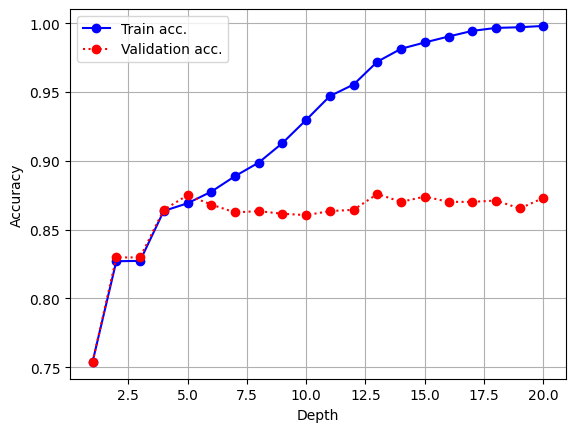

In [ ]:
plt.plot(depths, train_scores, 'bo-', label='Train acc.')
plt.plot(depths, val_scores, 'ro:', label='Validation acc.')

plt.grid()
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.show()

위 결과를 보면 의사결정 나무의 max_depth를 6보다 크게 하는 것은 검증 셋의 정확도를 높이지 못하고 과대적합(overfitting)만 더 커지는 결과를 줌.

max_depth의 값이 6보다 크면 일반화 성능이 떨어짐.

# 교차 검증(Cross Validation)

In [ ]:
# 전체 데이터를 훈련/테스트 셋으로 나누고, 훈련 셋(X_tr_total, y_tr_total)을 사용해서 교차 검증
# 교차 검증에서 사용할 머신 러닝 모델 생성
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
cv = cross_validate(estimator=tree_clf,          # 머신 러닝 모델
                    X=X_tr_total, y=y_tr_total,  # X=특성 배열, y=타겟 배열
                    cv=5,                        # 교차 검증 fold 개수
                    n_jobs=-1,                   # 병렬 작업 수
                    return_train_score=True)     # 훈련 셋 점수 리턴 여부
# 평가 점수(score)
# (1) 분류: 정확도(accuracy)
# (2) 회귀: 결정 계수(R2 score)

In [ ]:
cv  #> dict
# fit_time: 훈련 시간
# score_time: 평가 시간
# test_score: 검증 셋 점수(정확도)
# train_score: 훈련 셋 점수(정확도)

{'fit_time': array([0.00777292, 0.00810981, 0.00837851, 0.0073626 , 0.00530195]),
 'score_time': array([0.00133634, 0.00131059, 0.00125861, 0.00124216, 0.00080442]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [ ]:
# 검증 셋 점수들의 평균 -> 한번도 학습되지 않은 테스트 셋의 점수와 비슷하거나 조금 높을 수 있음.
np.mean(cv['test_score'])

0.8620333900940252

In [ ]:
tree_clf.fit(X_tr_total, y_tr_total)  # 전체 훈련 셋을 학습
tree_clf.score(X_te, y_te)  # 한번도 학습되지 않은 테스트 셋에서 점수 계산

0.8484615384615385